# Timescale estimate for self-interacting dark matter spikes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rc('font', family = 'roman')
import scipy

from SMBHBpy import constants as c

### Define SMBH binary and SIDM spikes

In [2]:
# SMBH masses
m = np.array([1e5, 1e7]) * c.solar_mass_to_pc
M = 2*m

sigma = 200 * 1e3 * c.m_to_pc/c.s_to_pc


# Influence radius and spike parameters
gamma_sp = 7/4
r_h = m/sigma**2
r_sp = 0.2*r_h

rho_sp = (3-gamma_sp)*0.2**(3-gamma_sp)*m/(2*np.pi*r_sp**3)

# r_in = r_ISCO
r_in = 6*m

def m_DM(r, i):
    return 4*np.pi*rho_sp[i]*r_sp[i]**gamma_sp/(3-gamma_sp)*r**(3-gamma_sp)

In [3]:
# timescale for dynamical friction

log_Lambda = 10

def t_DF(r,i):
    r_0 = 50*(2*r_in[i])
    return -m[i]**(1/2)/(2**(5/2)*np.pi*log_Lambda*rho_sp[i]*r_sp[i]**gamma_sp*(gamma_sp-3/2))*(r**(gamma_sp-3/2)-r_0**(gamma_sp-3/2))

In [4]:
def t_replenish(r,i):
    rho = rho_sp[i]*(r_sp[i]/r)**(gamma_sp)               # SIDM density at r
    sigma_m = 1 * 1/c.g_cm2_to_invpc                      # cross section per unit mass in cm^2/g
    v_DM = np.sqrt((m[i]+m_DM(r,i)-m_DM(r_in[i],i))/r)    # velocity of DM particles at r, according to virial theorem
    return (rho*sigma_m*v_DM)**(-1)

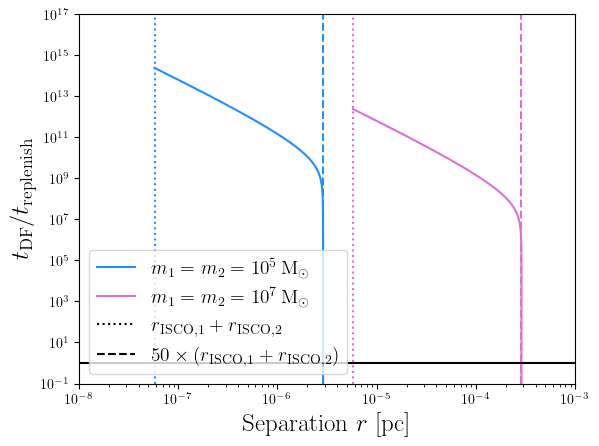

In [6]:
# Plot t_DF/t_replenish as a function of r

fig, ax1 = plt.subplots()
label_mass = [" $10^5\,\mathrm{M_{\odot}}$", " $10^7\,\mathrm{M_{\odot}}$"]
colors = ["dodgerblue", "orchid"]

for i in range(2):
    r = np.linspace(2*r_in[i], 50*2*r_in[i], int(1e4))
    plt.loglog(r, t_DF(r,i)/t_replenish(r,i), label = "$m_1 = m_2 = $"+label_mass[i], color = colors[i])
    plt.axvline(x=2*r_in[i], color = colors[i], linestyle = "dotted")
    plt.axvline(x=50*2*r_in[i], color = colors[i], linestyle = "--")
    
plt.loglog(1,1,label = r"$r_{\mathrm{ISCO,1}}+r_{\mathrm{ISCO,2}}$", color = "black", linestyle = "dotted")
plt.loglog(1,1,label = r"$50\times (r_{\mathrm{ISCO,1}}+r_{\mathrm{ISCO,2}})$", color = "black", linestyle = "--")
plt.legend(loc='lower left', fontsize=14)
plt.xlabel(r"Separation $r$ [pc]", fontsize = 18)
plt.ylabel(r"$t_\mathrm{DF}/t_\mathrm{replenish}$", fontsize = 18)
plt.axhline(y=1, color = "black", linestyle = "solid")
plt.ylim(1e-1, 1e17)
plt.xlim(1e-8,1e-3);